In [315]:
import pandas as pd
import numpy as np
from statsmodels.graphics import tsaplots
from statsmodels.stats import diagnostic
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import scipy

from load_dataset import Dataset
import plotting

In [271]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [316]:
dataset = Dataset('../data/dataset/')

In [273]:
# Возьмем временной ряд.

In [327]:
ts = dataset['hour_3553.csv']

In [328]:
# нарисуем. Видим ярко выраженную сезонность и гетероскедастичность.

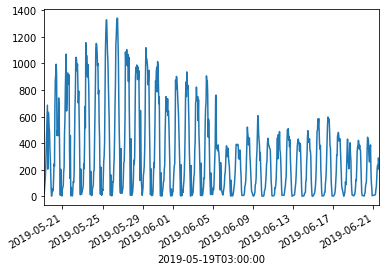

In [329]:
ts.plot()

In [320]:
# Посммотрим график автокорреляций - видим что ряд сильно коррелирует сам с собой.

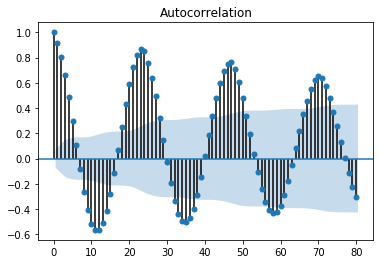

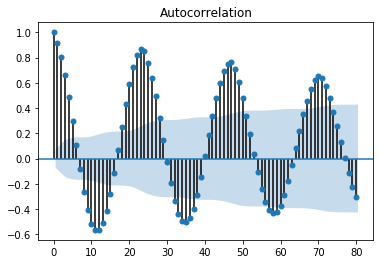

In [330]:
tsaplots.plot_acf(ts, lags=80)

In [279]:
# проверим автокорреляция при помощи теса Ланга-Бокса

In [331]:
_, p_value = diagnostic.acorr_ljungbox(ts)

In [332]:
# видим, что значения p-value сильно ниже порога (обычно 0.05, 0.01), значит мы смело отвергаем нулевую гипотезу
# то есть данные явно не случайны
max(p_value), min(p_value)

(3.0421437025448445e-139, 0.0)

In [333]:
# проверим ряд на стационарость критерием Дики-Фуллера
# видим, что p-value сильно выше порога, значит мы никак не можем отвергнуть нулевую гипотезу, следовательно -
# ряд не стационарен
p_value = adfuller(ts)[1]
p_value

0.4088513375642021

In [334]:
# Попробуем сделать его стационарным
# Для начала постараемся избавиться от гетероскедастичности, взяв логарифм
ts_log = np.log(ts)

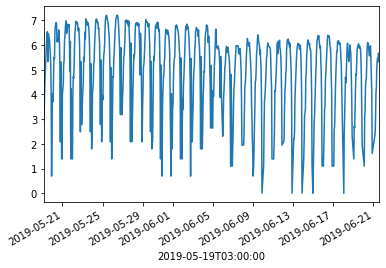

In [335]:
ts_log.plot()
# отлично, на вид, гетероскедастичность ушла

In [336]:
# впрочем, наши статистические тесты остались этим неудовлетворены и снова показывают крайнюю нестационарность
# скоррелированность
_, p_value = diagnostic.acorr_ljungbox(ts_log)
print(min(p_value), max(p_value))
print(adfuller(ts)[1])

0.0 6.978730429542854e-101
0.4088513375642021


In [337]:
# чтож, попробуем применить дифференцирование
ts_diff = ts_log.diff()

In [338]:
_, p_value = diagnostic.acorr_ljungbox(ts_diff.dropna(), lags=70)
print(min(p_value), max(p_value))
print(adfuller(ts_diff.dropna())[1])

1.9781548161090053e-62 0.004088393777012744
0.0


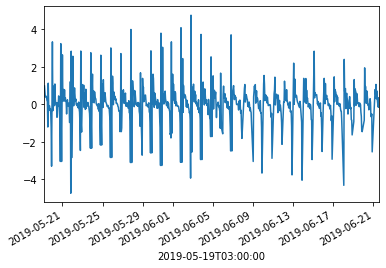

In [308]:
ts_diff.plot()

In [290]:
# кхмм, опять не помогает, давайте посмотрим на график автокорреляций и увидим, что период сезонности 
# приходится на 24 лаг, попробуем сезонное дифференцирование

In [339]:
ts_season_diff = ts_log.diff(24)

In [340]:
_, p_value = diagnostic.acorr_ljungbox(ts_season_diff.dropna(), lags=150)
print(min(p_value), max(p_value))
print(adfuller(ts_season_diff.dropna())[1])

0.0 1.268291930561308e-52
0.0002304289257545076


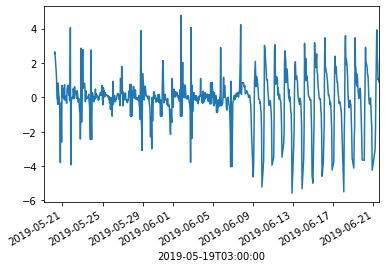

In [343]:
ts_season_diff.plot()

Задание:
    1. Выбрать несколько временных рядов.
    2. Используя вышеперечисленные преобразования, добиться стационарности ряда.
    3. Критерием стационарности будет служить значение p-value теста Дики-Фуллера, меньшее 0.05

In [348]:
# Бонус - пример простого обратно трансформирования ряда. По сути, к ряду просто применяются обратные операторы.
# exp для log, кумулятивная сумма для дифференцирования

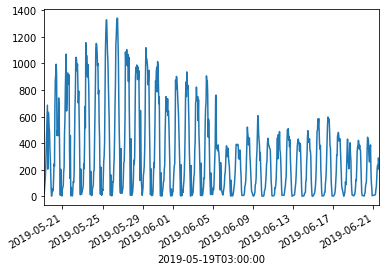

In [360]:
ts.plot()

In [361]:
transformed = np.log(ts).diff()

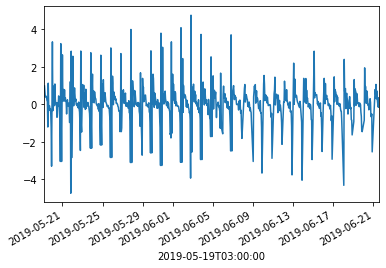

In [362]:
transformed.plot()

In [363]:
back_transformed = np.exp(transformed.cumsum())

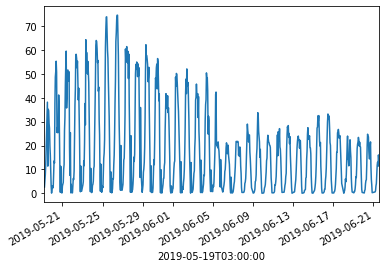

In [364]:
back_transformed.plot()